# HPI Calibration Step 1 - Feb 2, 2016

Grab the intital co-simulation results from the HPI building and compare to measured data

In [1]:
%matplotlib inline

import esoreader
reload(esoreader)
import pandas as pd
import os
import seaborn as sns

/Users/Clayton/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Get Simulated CoSim -- Assumed to be version 6.4

In [2]:
# change this to point to where you checked out the GitHub project
PROJECT_PATH = r"/Users/Clayton/Dropbox/results/"

# this is the output of the workflow
ESO_PATH = os.path.join(PROJECT_PATH, '06.4-cosim-HPI', '06.4-cosim-HPI.eso')

# this is where we will store the aggregated heating and cooling data
OUTPUT_PATH = os.path.join(PROJECT_PATH, '06.4-cosim-HPI', '06.4-cosim-HPI.csv')

# yeah... we need an index for timeseries...
HOURS_IN_YEAR = pd.date_range('2013-01-01', '2013-12-31 T23:00', freq='H')

In [3]:
hpi = esoreader.read_from_path(ESO_PATH)

In [7]:
# we are probably interested in the 'Zone_XYZ Total Heating Energy' variables...
# after looking at the data, it seems they all have the key: "EMS"
#sorted(set(map(lambda t: t[2], hpi.find_variable('total heating energy', key='EMS'))))

In [8]:
heating = hpi.to_frame('total heating energy', index=HOURS_IN_YEAR, use_key_for_columns=False)#.sum(axis=1)
cooling = hpi.to_frame('total cooling energy', index=HOURS_IN_YEAR, use_key_for_columns=False)#.sum(axis=1)
df = pd.DataFrame({'Total Heating Energy': heating['Zone Ideal Loads Zone Total Heating Energy'], 
                   'Total Cooling Energy': cooling['Zone Ideal Loads Zone Total Cooling Energy']})
df_cosim = df*0.000000277777778


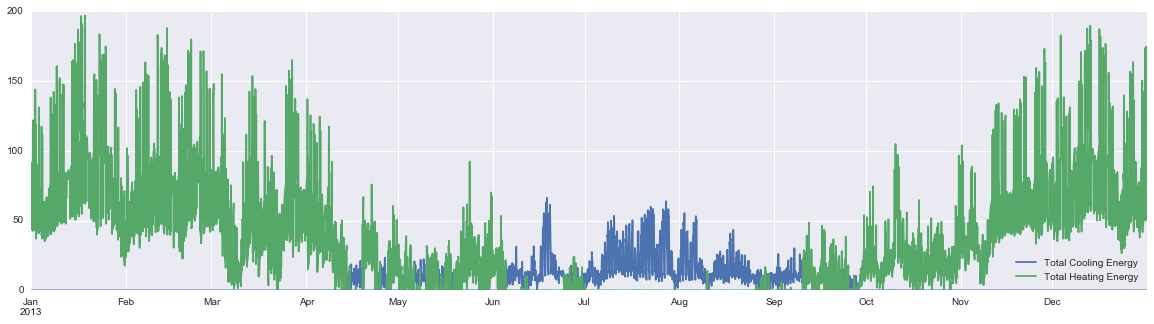

In [9]:
df_cosim.plot(figsize=(20,5));

# Get simulated EnergyPlus only -- assumed to be simulation version 8

In [10]:
# this is the output of the workflow
ESO_PATH = os.path.join(PROJECT_PATH, '08-energyplus-HPI', '08-energyplus-HPI.eso')

In [11]:
hpi = esoreader.read_from_path(ESO_PATH)
heating = hpi.to_frame('total heating energy', index=HOURS_IN_YEAR, use_key_for_columns=False)#.sum(axis=1)
cooling = hpi.to_frame('total cooling energy', index=HOURS_IN_YEAR, use_key_for_columns=False)#.sum(axis=1)
df = pd.DataFrame({'Total Heating Energy': heating['Zone Ideal Loads Zone Total Heating Energy'], 
                   'Total Cooling Energy': cooling['Zone Ideal Loads Zone Total Cooling Energy']})
df_eplus = df*0.000000277777778

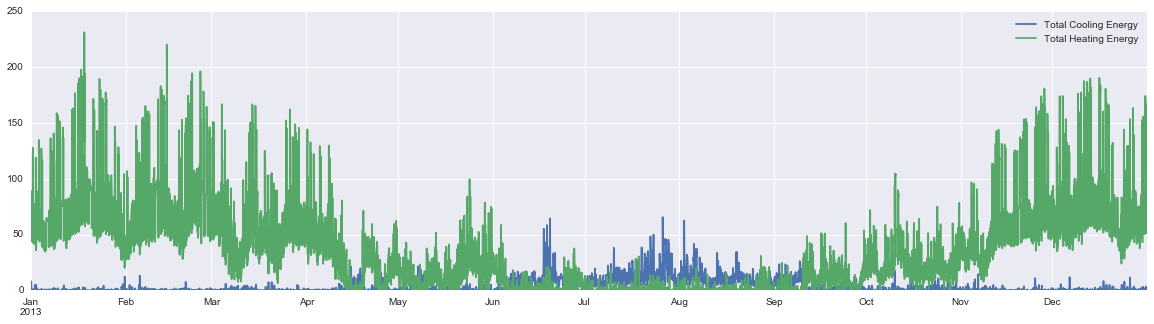

In [12]:
df_eplus.plot(figsize=(20,5));

In [13]:
df_diff = df_eplus - df_cosim

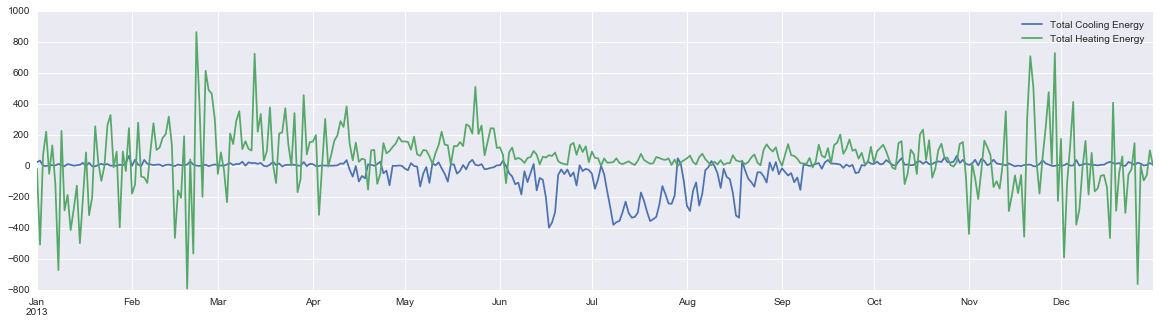

In [14]:
df_diff.resample('D', how='sum').plot(figsize=(20,5));

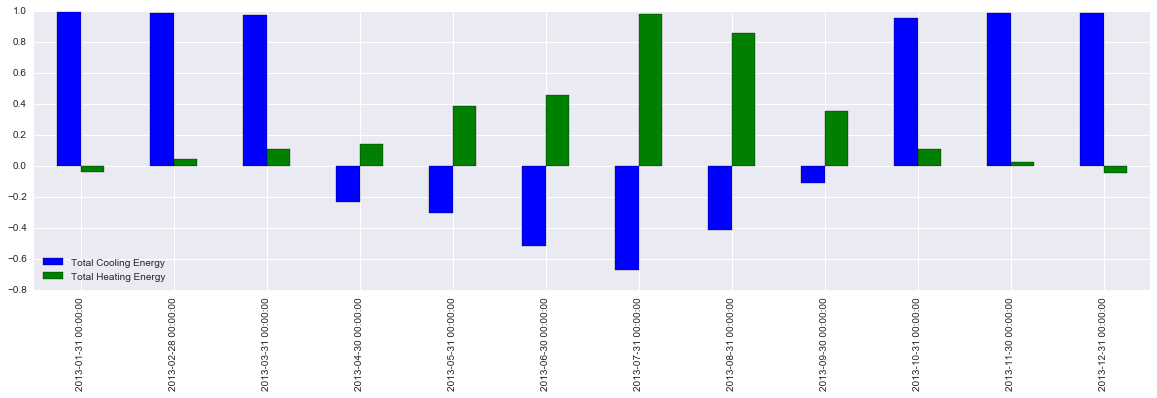

In [15]:
df_diff_perc = df_diff.resample('M', how='sum')/df_eplus.resample('M', how='sum')
df_diff_perc.plot(kind='bar',figsize=(20,5))

# Compare with measured data

In [16]:
workingdir = "/Users/Clayton/Dropbox/03-ETH/98-UMEM/RawDataAnalysis/"
df_meas = pd.read_csv(workingdir+"aggset2_QW/HPI_QW.csv", index_col="Date Time", parse_dates=True)
point = "HPIMKA01QW_A [kWh]"
df_meas_cooling = pd.DataFrame(df_meas[point].truncate(before='2013',after='2014'))
df_meas_cooling = df_meas_cooling[(df_meas_cooling<50)]

In [17]:
point = "HPIMHE01QW_A [kWh]"
df_meas_heating = pd.DataFrame(df_meas[point].truncate(before='2013',after='2014'))
df_meas_heating = df_meas_heating[(df_meas_heating<1000)]

In [18]:
#df_meas_cooling.plot(figsize=(20,5));

In [19]:
#df_meas_heating.plot(figsize=(20,5));

In [20]:
df_meas = pd.DataFrame({'Total Heating Energy': df_meas_heating["HPIMHE01QW_A [kWh]"], 
                   'Total Cooling Energy': df_meas_cooling["HPIMKA01QW_A [kWh]"]})

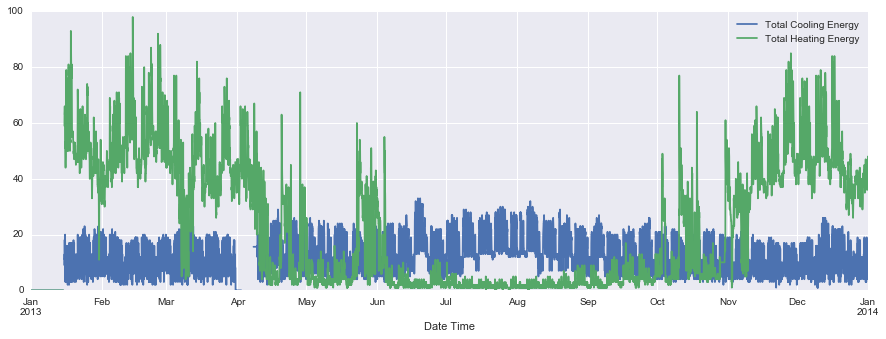

In [41]:
df_meas.plot(figsize=(15,5));

In [23]:
df_allcooling = pd.DataFrame({"CoSim":df_cosim['Total Cooling Energy'], 
                              "EnergyPlus":df_eplus['Total Cooling Energy'],
                              "Measured":df_meas['Total Cooling Energy']})

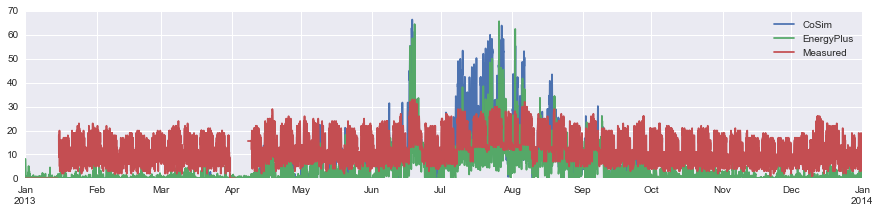

In [40]:
df_allcooling.plot(figsize=(15,3));

In [26]:
df_allheating = pd.DataFrame({"CoSim":df_cosim['Total Heating Energy'], 
                              "EnergyPlus":df_eplus['Total Heating Energy'],
                              "Measured":df_meas['Total Heating Energy']})

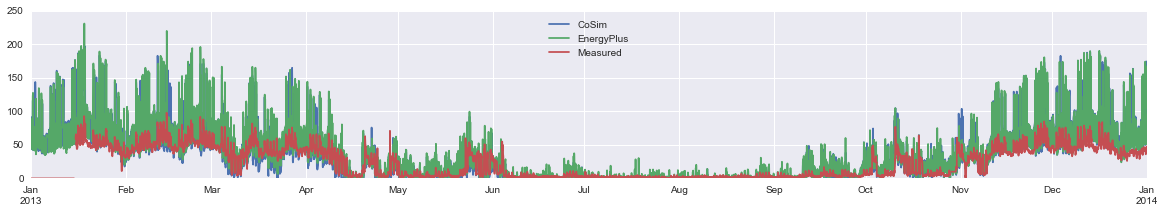

In [27]:
df_allheating.plot(figsize=(20,3));

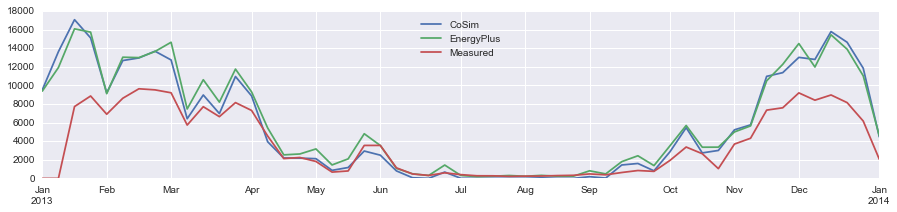

In [38]:
df_allheating.resample('W', how='sum').plot(figsize=(15,3));

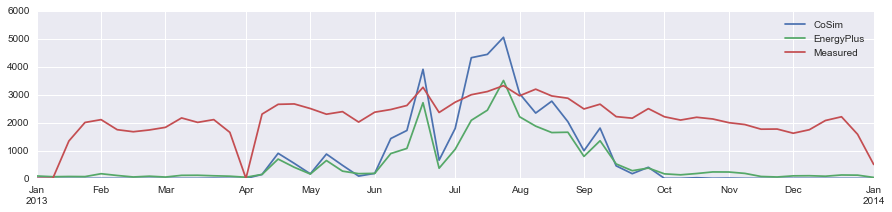

In [39]:
df_allcooling.resample('W', how='sum').plot(figsize=(15,3));

In [29]:
df_diff_cosim = df_meas - df_cosim
df_diff_eplus = df_meas - df_eplus

In [33]:
df_diff_heating = pd.DataFrame({"CoSim":df_diff_cosim['Total Heating Energy'].resample('W'), 
                        "EnergyPlus":df_diff_cosim['Total Heating Energy'].resample('W')})

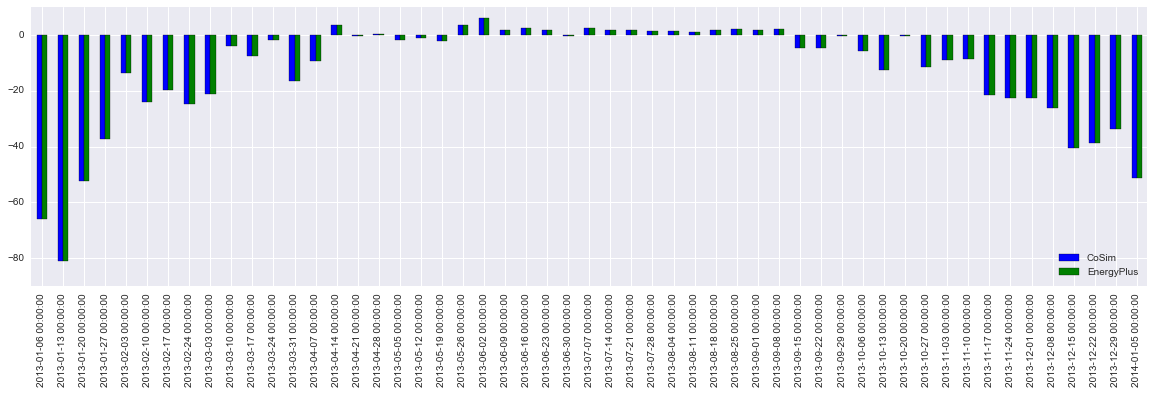

In [34]:
df_diff_heating.plot(kind='bar',figsize=(20,5));